In [1]:
import numpy as np
import pandas as pd
import brainlit
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from brainlit.algorithms.regression import *

from brainlit.preprocessing.features import neighborhood as nbrhood

Using TensorFlow backend.


# Tutorial for running the classifiers on extracted features - 3x3 neighborhoods

Loading extracted neighborhood features from csv file(This file will be changed to include the whole data).<br />
The neighborhood here is a 3x3x3 with 27 features and 150 samples, subsampled from a larger neighborhood of 41x41x41.

In [22]:
from zipfile import ZipFile
file_name = "feather_files.zip"
X = []
y_all = []
orig_neigh_size = (41,41,41)
sub_size = (3,3,3)
with ZipFile(file_name, 'r') as zip: 
    filelist = zip.namelist()
    for i in range(0,len(filelist)):
        try:
            f = zip.extract(filelist[i])
            dat = pd.read_feather(f)
            a1 = dat.iloc[:, 3:].to_numpy()
            ###subneighborhood
            X1 = nbrhood.subsample(np.transpose(a1), orig_neigh_size, sub_size)
            X.append(X1.transpose());
            y1 = dat['Label']
            y_all.append(y1)
        except:
            print("gone" + filelist[i])
            pass
np.array(X).shape,np.array(y_all).shape

((3, 50, 27), (3, 50))

In [23]:
n_features=sub_size[0]*sub_size[1]*sub_size[2]
X_all = X
no_samps = np.array(X_all).shape[0]*np.array(X_all).shape[1]
X_all = np.array(X_all)
X_all.resize(no_samps,n_features)
y_all = np.array(y_all).ravel()
X_all.shape, y_all.shape

((150, 27), (150,))

Generating Labels

In [24]:
y_all = np.zeros(len(X_all))
for i in range(0,len(y_all),2):
    y_all[i] = 1
y_all = np.array(y_all)
X_all.shape,y_all.shape

((150, 27), (150,))

Normalizing and splitting the dataset

In [25]:
X_all = StandardScaler().fit_transform(X_all)
print(np.array(X_all).shape)
X_sel, X_test, y_sel, y_test = train_test_split(
    X_all, y_all, test_size=10, random_state=42)

(150, 27)


Setting up classifiers to train:<br />
1) Multilayer Perceptron with 4 hiddenlayer, all layers having sigmoid activation.<br />
2) Simple Logistic Regression classifier<br />
3) Two layer Neural Network with output Logistic Regression layer with sigmoid activation and input layer is a fullyconnected layer with ReLU activation.<br />

In [26]:
classifiers = [
    MLPClassifier(hidden_layer_sizes=4, activation="logistic", alpha=1, max_iter=1000),
    LogisticRegression(max_iter=1000),
    MLP_LR_NN(X_sel, y_sel, n_features),
]

Running the classifiers on the train and test data to get accuracy of each classifier.<br />
The accuracy, train time, test time, classifier name and number of iteration is stored in a csv file : "test.csv"

In [27]:
names = {"MLP-LR": "black", "LR": "blue", "MLP-relu-LR": "red"}
run_classifiers(
        X_sel, y_sel, X_test, y_test, classifiers, names, filename="Dataset_nonlinear_features/tests/test_feather.csv")

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

 33%|███▎      | 1/3 [00:00<00:00,  7.25it/s]

10/10 [==============================] - 0s 2ms/step




100%|██████████| 3/3 [00:00<00:00,  4.37it/s]

 10%|█         | 1/10 [00:00<00:06,  1.46it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

 33%|███▎      | 1/3 [00:00<00:00,  9.97it/s]

10/10 [==============================] - 0s 2ms/step




100%|██████████| 3/3 [00:00<00:00,  5.38it/s]

 20%|██        | 2/10 [00:01<00:05,  1.54it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

 33%|███▎      | 1/3 [00:00<00:00,  7.00it/s]

10/10 [==============================] - 0s 2ms/step




100%|██████████| 3/3 [00:00<00:00,  5.18it/s]

 30%|███       | 3/10 [00:01<00:04,  1.59it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

 33%|███▎      | 1/3 [00:00<00:00,  9.97it/s]

10/10 [==============================] - 0s 2ms/step




100%|██████████| 3/3 [00:00<00:00,  5.43it/s]

 40%|████      | 4/10 [00:02<00:03,  1.65it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

 33%|███▎      | 1/3 [00:00<00:00,  9.97it/s]

10/10 [==============================] - 0s 2ms/step




100%|██████████| 3/3 [00:00<00:00,  5.47it/s]

 50%|█████     | 5/10 [00:02<00:02,  1.69it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

 33%|███▎      | 1/3 [00:00<00:00,  9.98it/s]

10/10 [==============================] - 0s 0us/step




100%|██████████| 3/3 [00:00<00:00,  4.74it/s]

 60%|██████    | 6/10 [00:03<00:02,  1.65it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

 33%|███▎      | 1/3 [00:00<00:00,  8.63it/s]

10/10 [==============================] - 0s 0us/step




100%|██████████| 3/3 [00:00<00:00,  4.86it/s]

 70%|███████   | 7/10 [00:04<00:01,  1.64it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

 67%|██████▋   | 2/3 [00:00<00:00, 18.22it/s]

10/10 [==============================] - 0s 2ms/step




100%|██████████| 3/3 [00:00<00:00,  5.80it/s]

 80%|████████  | 8/10 [00:04<00:01,  1.70it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

 33%|███▎      | 1/3 [00:00<00:00,  7.08it/s]

10/10 [==============================] - 0s 1ms/step




100%|██████████| 3/3 [00:00<00:00,  4.88it/s]

 90%|█████████ | 9/10 [00:05<00:00,  1.68it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

10/10 [==============================] - 0s 2ms/step




100%|██████████| 3/3 [00:00<00:00,  5.31it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

10/10 [==============================] - 0s 2ms/step




100%|██████████| 3/3 [00:00<00:00,  4.11it/s]

 10%|█         | 1/10 [00:00<00:06,  1.34it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

10/10 [==============================] - 0s 1ms/step




100%|██████████| 3/3 [00:00<00:00,  4.93it/s]

 20%|██        | 2/10 [00:01<00:05,  1.42it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

 33%|███▎      | 1/3 [00:00<00:00,  9.45it/s]

10/10 [==============================] - 0s 3ms/step




100%|██████████| 3/3 [00:01<00:00,  2.24it/s]

 30%|███       | 3/10 [00:02<00:06,  1.12it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

 67%|██████▋   | 2/3 [00:00<00:00, 19.95it/s]

10/10 [==============================] - 0s 2ms/step




100%|██████████| 3/3 [00:00<00:00,  4.34it/s]

 40%|████      | 4/10 [00:03<00:05,  1.20it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

10/10 [==============================] - 0s 2ms/step




100%|██████████| 3/3 [00:00<00:00,  5.15it/s]

 50%|█████     | 5/10 [00:03<00:03,  1.31it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

10/10 [==============================] - 0s 2ms/step




100%|██████████| 3/3 [00:00<00:00,  5.20it/s]

 60%|██████    | 6/10 [00:04<00:02,  1.41it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

10/10 [==============================] - 0s 2ms/step




100%|██████████| 3/3 [00:00<00:00,  4.71it/s]

 70%|███████   | 7/10 [00:05<00:02,  1.46it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

 33%|███▎      | 1/3 [00:00<00:00,  9.35it/s]

10/10 [==============================] - 0s 1ms/step




100%|██████████| 3/3 [00:00<00:00,  3.81it/s]

 80%|████████  | 8/10 [00:06<00:01,  1.38it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

10/10 [==============================] - 0s 1ms/step




100%|██████████| 3/3 [00:00<00:00,  4.57it/s]

 90%|█████████ | 9/10 [00:06<00:00,  1.42it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

10/10 [==============================] - 0s 1ms/step




100%|██████████| 3/3 [00:00<00:00,  4.93it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

10/10 [==============================] - 0s 2ms/step




100%|██████████| 3/3 [00:00<00:00,  4.47it/s]

 10%|█         | 1/10 [00:00<00:06,  1.49it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

10/10 [==============================] - 0s 1ms/step




100%|██████████| 3/3 [00:00<00:00,  4.68it/s]

 20%|██        | 2/10 [00:01<00:05,  1.51it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

 33%|███▎      | 1/3 [00:00<00:00,  8.19it/s]

10/10 [==============================] - 0s 1ms/step




100%|██████████| 3/3 [00:00<00:00,  4.17it/s]

 30%|███       | 3/10 [00:02<00:04,  1.47it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

10/10 [==============================] - 0s 0us/step




100%|██████████| 3/3 [00:00<00:00,  4.57it/s]

 40%|████      | 4/10 [00:02<00:04,  1.48it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

10/10 [==============================] - 0s 2ms/step




100%|██████████| 3/3 [00:00<00:00,  4.48it/s]

 50%|█████     | 5/10 [00:03<00:03,  1.49it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

10/10 [==============================] - 0s 1ms/step




100%|██████████| 3/3 [00:00<00:00,  4.87it/s]

 60%|██████    | 6/10 [00:03<00:02,  1.52it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

10/10 [==============================] - 0s 1ms/step




100%|██████████| 3/3 [00:00<00:00,  3.65it/s]

 70%|███████   | 7/10 [00:04<00:02,  1.41it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

 33%|███▎      | 1/3 [00:00<00:00,  8.27it/s]

10/10 [==============================] - 0s 2ms/step




100%|██████████| 3/3 [00:00<00:00,  4.40it/s]

 80%|████████  | 8/10 [00:05<00:01,  1.43it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

10/10 [==============================] - 0s 410us/step




100%|██████████| 3/3 [00:00<00:00,  4.85it/s]

 90%|█████████ | 9/10 [00:06<00:00,  1.48it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

10/10 [==============================] - 0s 0us/step




100%|██████████| 3/3 [00:00<00:00,  5.00it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

10/10 [==============================] - 0s 1ms/step




100%|██████████| 3/3 [00:00<00:00,  3.32it/s]

 10%|█         | 1/10 [00:00<00:08,  1.11it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

10/10 [==============================] - 0s 3ms/step




100%|██████████| 3/3 [00:00<00:00,  3.05it/s]

 20%|██        | 2/10 [00:01<00:07,  1.07it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

 33%|███▎      | 1/3 [00:00<00:00,  9.91it/s]

10/10 [==============================] - 0s 2ms/step




100%|██████████| 3/3 [00:00<00:00,  3.10it/s]

 30%|███       | 3/10 [00:02<00:06,  1.06it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

 67%|██████▋   | 2/3 [00:00<00:00, 19.03it/s]

10/10 [==============================] - 0s 0us/step




100%|██████████| 3/3 [00:00<00:00,  3.32it/s]

 40%|████      | 4/10 [00:03<00:05,  1.07it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

10/10 [==============================] - 0s 2ms/step




100%|██████████| 3/3 [00:00<00:00,  3.53it/s]

 50%|█████     | 5/10 [00:04<00:04,  1.10it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

10/10 [==============================] - 0s 1ms/step




100%|██████████| 3/3 [00:00<00:00,  3.43it/s]

 60%|██████    | 6/10 [00:05<00:03,  1.11it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

10/10 [==============================] - 0s 1ms/step




100%|██████████| 3/3 [00:00<00:00,  3.35it/s]

 70%|███████   | 7/10 [00:06<00:02,  1.11it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

10/10 [==============================] - 0s 1ms/step




100%|██████████| 3/3 [00:00<00:00,  3.18it/s]

 80%|████████  | 8/10 [00:07<00:01,  1.10it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

10/10 [==============================] - 0s 2ms/step




100%|██████████| 3/3 [00:00<00:00,  3.04it/s]

 90%|█████████ | 9/10 [00:08<00:00,  1.07it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

10/10 [==============================] - 0s 2ms/step




100%|██████████| 3/3 [00:00<00:00,  3.31it/s]

100%|██████████| 4/4 [00:29<00:00,  7.30s/it]


'Dataset_nonlinear_features/tests/test_feather.csv'

The data from "test.csv" can be plotted using the plot_data function as follows

In [28]:
names = {"MLP-LR": "black", "LR": "blue", "MLP-relu-LR": "red"}
fig,ax = plot_data("Dataset_nonlinear_features/tests/test_feather.csv", names, "Accuracy", "Accuracy", "MLP-LR vs LR classification - neighborhood")

C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\brainlit\algorithms\regression\log_regression.py:209: MatplotlibDeprecationWarning: Unrecognized location 'bottom right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  plt.legend(loc="bottom right", title="Algorithm")


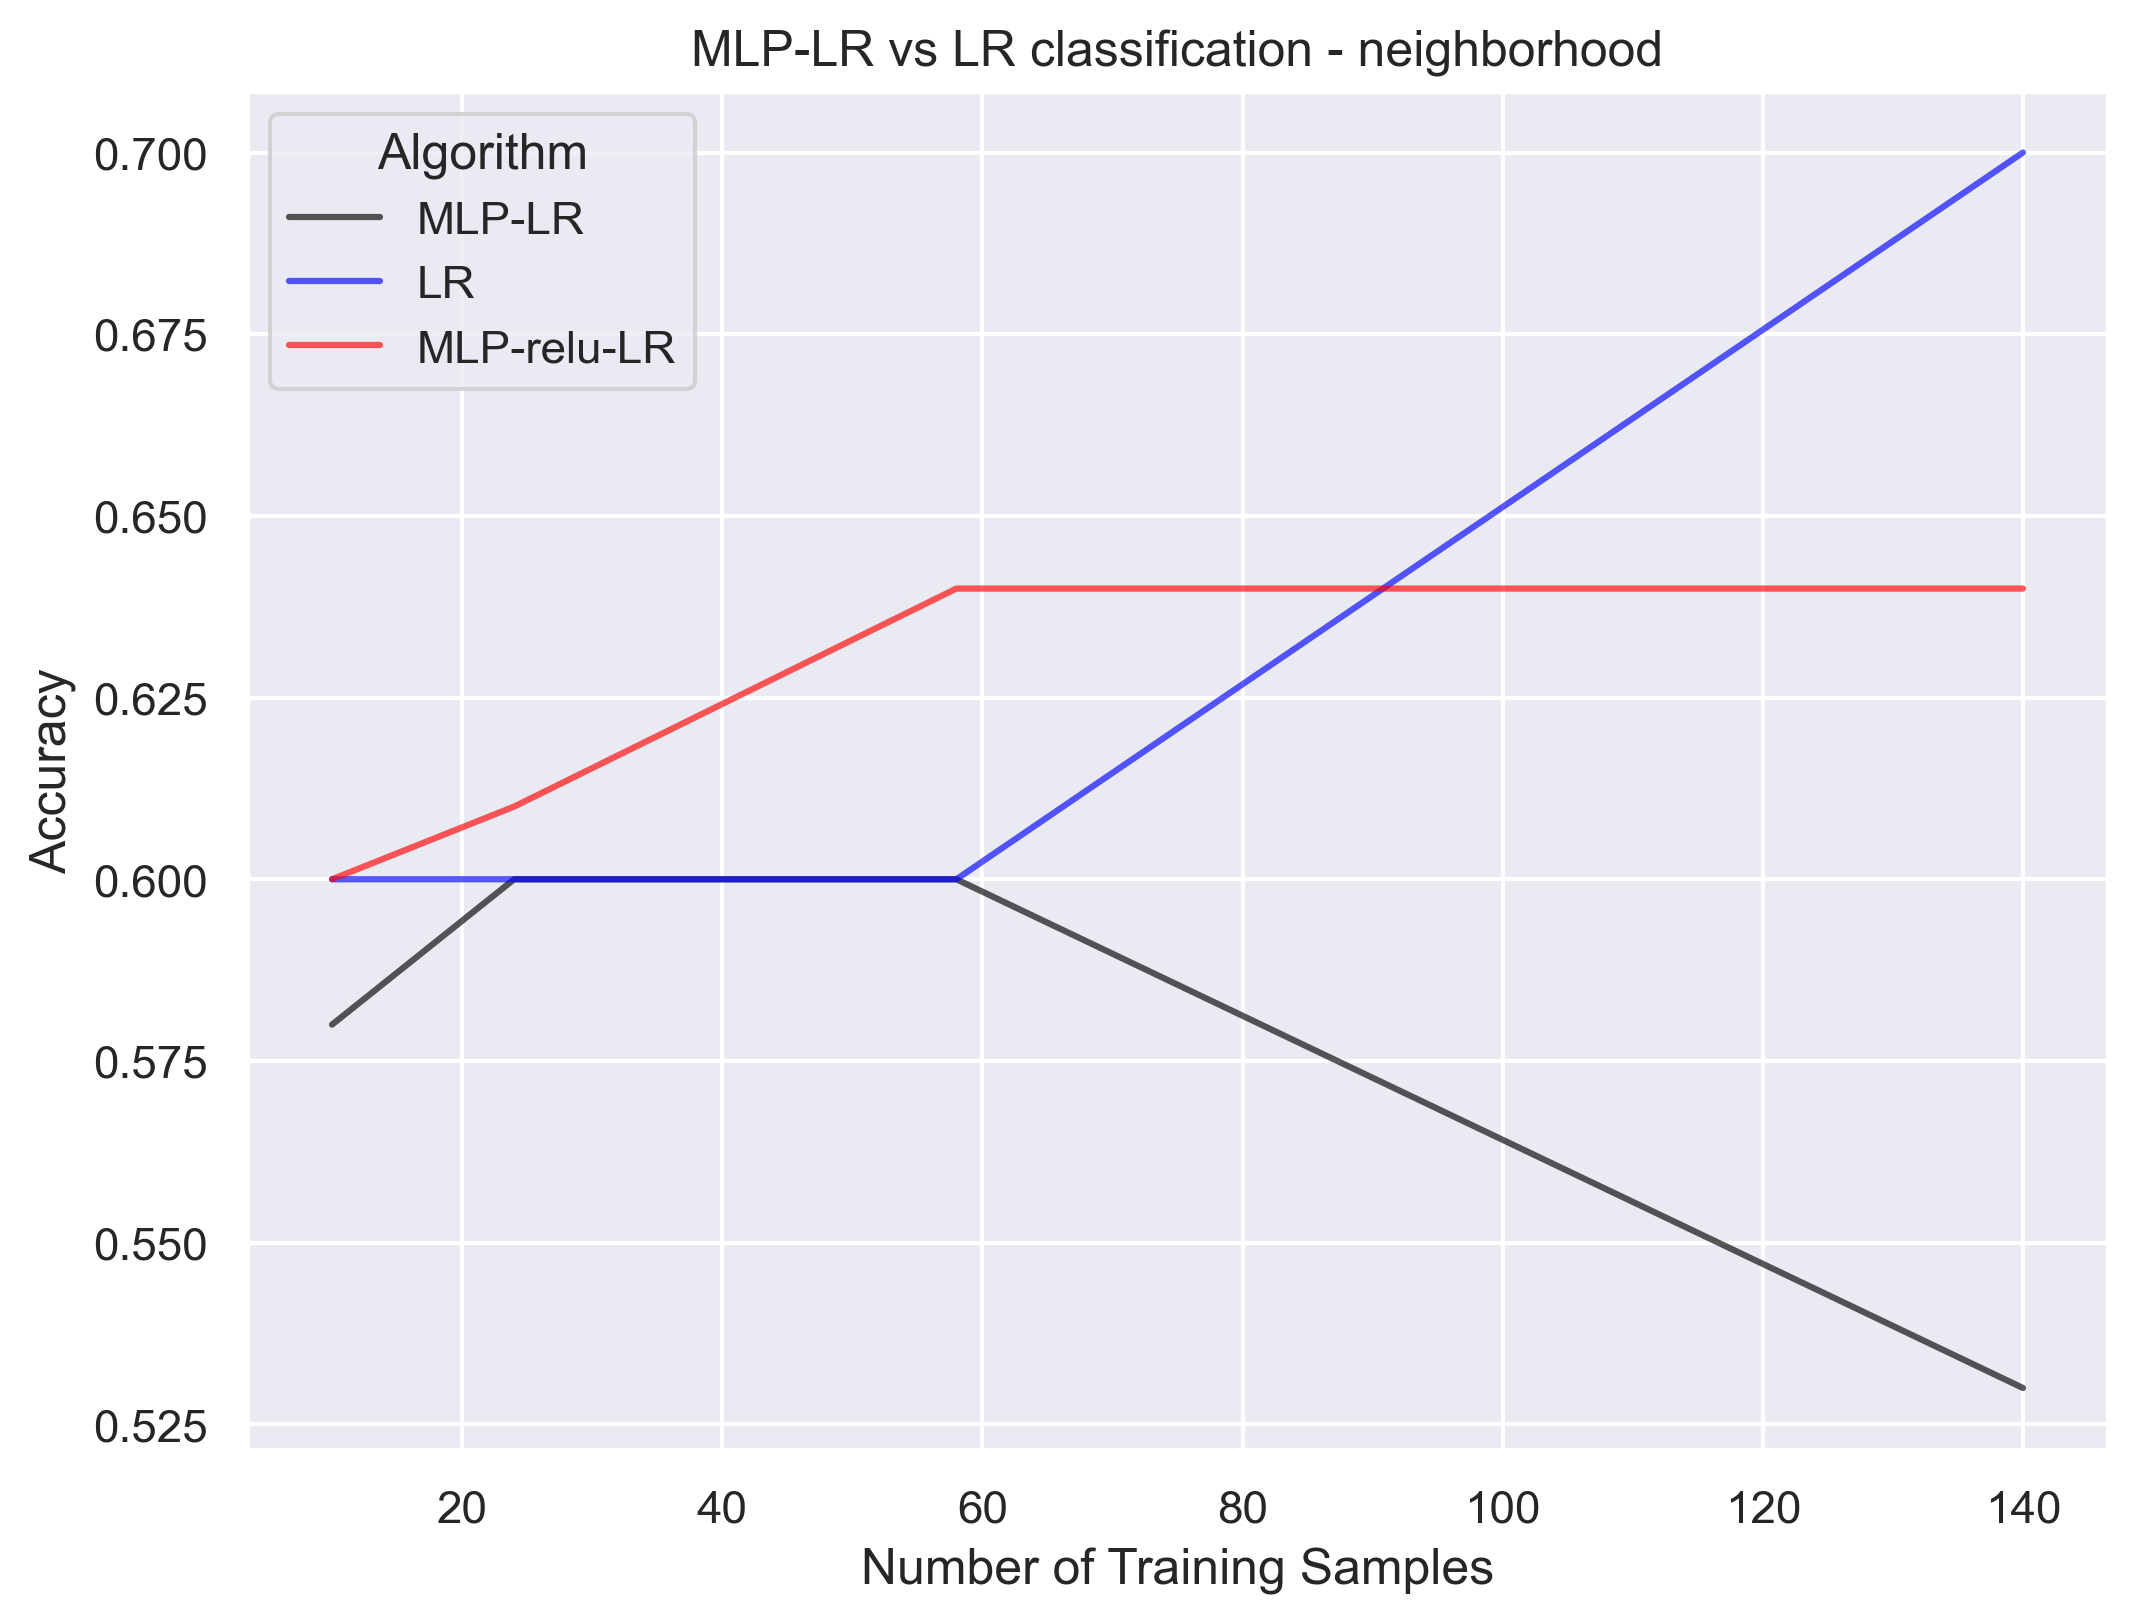

In [29]:
fig